In [133]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

In [134]:
def get_state_vectors(chunks):
    density_matrix = 0
    ans = []
    for i, chunk in enumerate(chunks):
        result = simulator.simulate(chunk, initial_state=density_matrix)
        ans.append(result.final_density_matrix)
        density_matrix = result.final_density_matrix
    return ans

In [135]:
def basic_circuit_without_channel():
    yield cirq.X(q0), cirq.X(q1)
    yield cirq.H(q0), cirq.H(q1)
    yield cirq.CX(q0, q1)
    yield cirq.H(q0), cirq.H(q1)


In [138]:
q0, q1 = cirq.LineQubit.range(2)

p = 0.001

circuit = cirq.Circuit()

circuit.append(basic_circuit_without_channel())

print(circuit)

simulator = cirq.DensityMatrixSimulator()

densities_with_channels = []
densities_without_channels = []

for step_result in simulator.simulate_moment_steps(circuit):
    densities_without_channels.append(step_result.density_matrix())

circuit = circuit.with_noise(cirq.depolarize(p=p))

for step_result in simulator.simulate_moment_steps(circuit):
    densities_with_channels.append(step_result.density_matrix())

fidelities = [1]
for i in range(len(densities_without_channels)):
    fidelities.append(cirq.fidelity(cirq.density_matrix(densities_without_channels[i]), cirq.density_matrix(densities_with_channels[2 * i + 1])))

0: ───X───H───@───H───
              │
1: ───X───H───X───H───


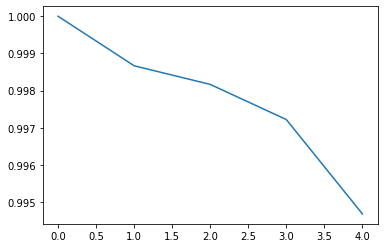

In [139]:
plt.plot(np.arange(0, len(fidelities)), fidelities)